# Project: Exploring effects of Central Bank's monetary policy 

>by Kirill Ryzhov<br>
>February 2018</div>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data">Dataset</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Interim observation">Interim observation</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Q1 Conclusions">Conclusions Q1</a></li>
<li><a href="#Q2 Conclusions">Conclusions Q2</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Ideas to explore

The focus of the project is to explore a codependance structure of Central Bank's monetary policy (discount rate, bank rate or interest rate - CB DR) on other economic factors such as GDP, inflation, unemployement, foreign investments, debt servicing cost, and international trade.  

### Premise

Bank rate has a direct impact on the lending rates offered by commercial banks to the businesses and individual clients, and in theory has direct impact on economy growth and competiteveness. 

High Central bank interest rate attracts may attract foreign investments, and therefore engage the growth of economy. [Ref.](https://en.wikipedia.org/wiki/Federal_funds_rate)

The rates are also often used to manage the country currency supply. Theoretically, low bank rate (cheap money) enforce economy growth and reduces the unemployement. Thus, the reduction of the bank rate followed by increase of the employement rate, since businesses and financial institutions get funds at low-priced rates.

Another aspect of monetary policy is inflation, which may be caused by lower interest rate, increased by the amount of borrowing. Inflation causes trade deficit, since it results in higher production cost thus rendering exports in-competitive, which in turn, reduces exports and widens trade deficit.

To confirm the theoretical premises, the report poses the following questions:
1. What is the global trend for GDP and Central Bank interest rates?
2. Does bank interest rate correlates with GDP growth, Investment Inflows, Export and Debt servicing cost?
3. Does interest rate has a direct connection with unemployement rate, tax and inflation?
4. Which of the above factors (incl. Trade Balance) affect tax inflow?

Varaiables:
- Central Bank Interest Rate
- Time 
- GDP
- Debt
- Investment
- Tax Inflow

Methodology brief:
1. Reduction to a single country / group of countries.
2. Imputation with n-neighbout average or mean.
3. Multiple variable explorations with correlation.
4. R/p- values for simple linear regressions.
5. Possbile Kernel distributions/regressions (kernel_regression library).

### Dataset details <a id='data'></a> 
A dataset for analysis falls under Economy category and provided by the World Bank. [Data Source.](https://www.gapminder.org/data/)<br>

The main sub-sets are: 
- Economy 
- Economic situation
- Incomes and growth
- Advanced debt & trade

The actual data tables used in the report.

|Item, no.|Description|Source|Category|Subcategory|
|:-|:-|:-|-|-|
|1|Central bank discount rate (annual %)|UN|Economy|Economic situation|
|2|Tax revenue (% of GDP)|World Bank|Economy|Economic situation|
|3|Investments (% of GDP)|World Bank|Economy|Economic situation|
|4|Inflation (annual %)|World Bank|Economy|Economic situation|
|5|Foreign direct investment, net outflows (% of GDP)|Various Sources|Economy|Economic situation|
|6|Foreign direct investment, net inflows (% of GDP)|World Bank|Economy|Economic situation|
|7|Exports (% of GDP)|World Bank|Economy|Debt & trade|
|8|Imports (% of GDP)|World Bank|Economy|Debt & trade|
|9|GDP per capita growth (annual %)|World Bank|Economy|Incomes & growth|
|10|External debt, total (USD, not inflation-adjusted)|World Bank|For advanced users|Advanced debt & trade|
|11|Debt servicing costs (% of exports and net income from abroad)|World Bank|For advanced users|Advanced debt & trade|
|12|Long term unemployment rate (%)|International Labour Organization|Work|Unemployment|


Some alternative sources used for the report:
[IMF Historical Public Debt Database](https://www.imf.org/en/Publications/WP/Issues/2016/12/31/A-Historical-Public-Debt-Database-24332)

In [1]:
# Import statements for all of the packages in use.
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# Reducing the head print volume
pd.set_option('display.max_columns', 8)

# Multiple outputs. Source goo.gl/e2zSnA
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" 

# import requests 
# response = requests.get('https://www.udacity.com')
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling
    
Loading the the data, check for cleanliness, and then trim and clean your dataset for analysis. 

It is expected for dataframes to have missing values.  48% global research studies has missing data. Most sources states that imputing statistically plausible if the missing rate of non-null units (elements) is above 90%. The report uses missing data rate percentile calculation. [Ref: Proportion of missing data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/#CR6)

The dataseries below this threshold in most cases are missing data at unit level, i.e. no data is presented for the entire period (MCAR). Hence, a listwise deletion may be applied without introduction of bias. Full disclosure will be made due course of the report.

The datasets missing values will be imputed with mean average.


### General Properties

In [208]:
#Exporting all csvs from the folder

import os 
from os.path import join
df_filelist=[]
for folder, subs, files in os.walk('data/'):
    for file in files:
        df_filelist.append(os.path.join(folder, file))

# Sort the list
df_filelist=sorted(df_filelist)

In [209]:
# Printing out first lines. Inspecting missing / errant data.
# reading data on country tax and country inflation
df_tax=pd.read_csv('data/02-tax.csv')
df_inf=pd.read_csv('data/04-inflation.csv')
df_tax.shape, df_tax.head(), df_inf.head(), df_inf.shape

((213, 23),
   Tax revenue (% of GDP)  1990  1991  1992  ...        2008       2009  \
 0            Afghanistan   NaN   NaN   NaN  ...    5.225979   7.266421   
 1                Albania   NaN   NaN   NaN  ...         NaN        NaN   
 2                Algeria   NaN   NaN   NaN  ...   45.255818  34.911834   
 3         American Samoa   NaN   NaN   NaN  ...         NaN        NaN   
 4                Andorra   NaN   NaN   NaN  ...         NaN        NaN   
 
        2010  2011  
 0  8.313807   NaN  
 1       NaN   NaN  
 2       NaN   NaN  
 3       NaN   NaN  
 4       NaN   NaN  
 
 [5 rows x 23 columns],
   Inflation, GDP deflator (annual %)     1961     1962      1963    ...      \
 0                           Abkhazia      NaN      NaN       NaN    ...       
 1                        Afghanistan      NaN      NaN       NaN    ...       
 2              Akrotiri and Dhekelia      NaN      NaN       NaN    ...       
 3                            Albania      NaN      NaN       Na

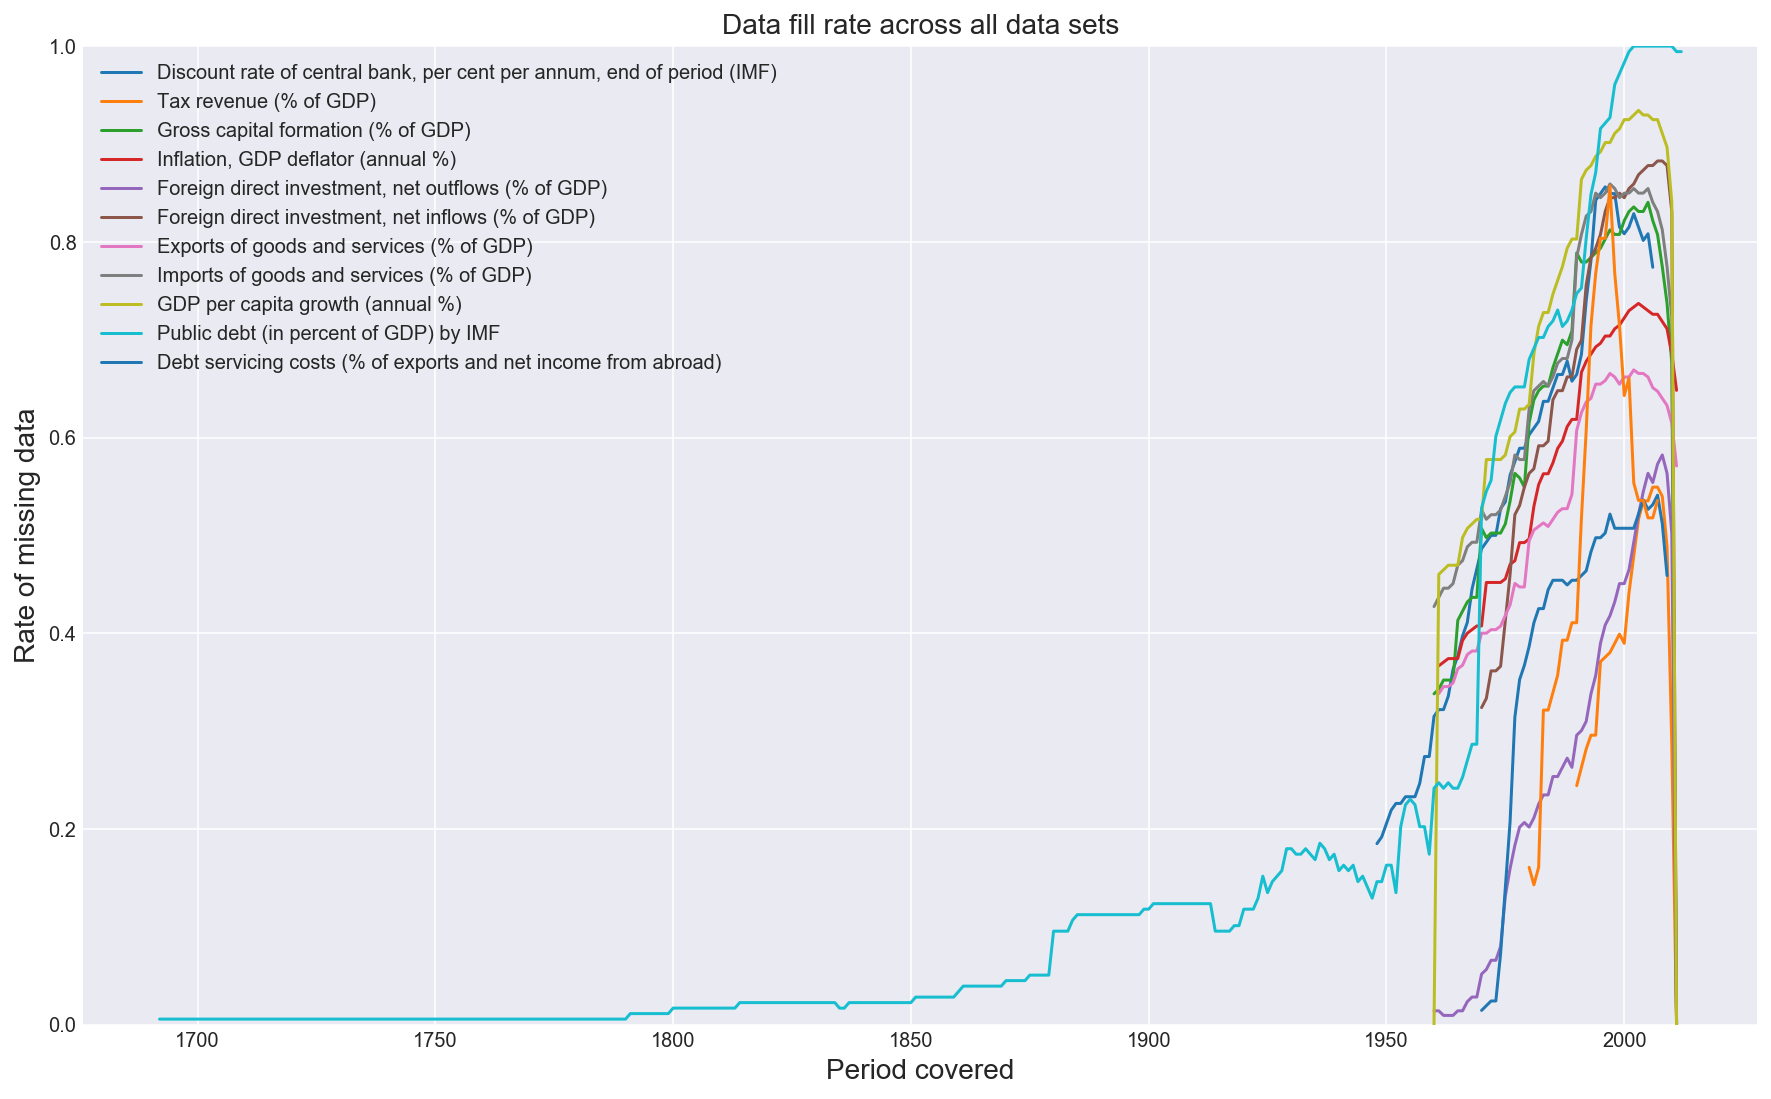

In [210]:
# Visualising rate of missing data plots for each dataset

def null_rate (df):
    name, period, null_dens = [], [], []
    
    for i in [i for i in range(df.shape[1]) if i!=0]:
        null_dens.append(df.iloc[:, i].count()/len(df.iloc[:, i]))
        period.append(int(df.columns[i])) 
    name=df.columns[0]
    
    # plotting results
    axes = plt.gca()
    axes.set_ylim([0, 1])    
    plt.title("Data fill rate across all data sets",fontsize=14)
    plt.xlabel("Period covered",fontsize=14)
    plt.ylabel("Rate of missing data",fontsize=14)
    plt.legend(loc='upper left')
    plt.rcParams["figure.figsize"] = [15,9]
    plt.plot(period, null_dens, label=name)


# Calling the plotting function
for df in df_filelist:
    f=pd.read_csv(df)
    null_rate(f)

In [211]:
# Recording data to data frame
df_info=pd.DataFrame(columns=["Description","File Name","Countries","Period","From","To","10Y Fill Rate"])

# Loooping across all files
for i,v in enumerate(df_filelist):
    f=pd.read_csv(v)
    df_info.loc[i,"Description"]=f.columns[0]
    df_info.loc[i,"Countries"]=f.iloc[:,0].count()
    df_info.loc[i,"Period"]=len(f.columns[:])
    df_info.loc[i,"From"]=f.columns[1]
    df_info.loc[i,"To"]=f.columns[-1]
    df_info.loc[i,"File Name"]=v
    
    # Fetchin filling rate Info for last 30 years
    fill_rate=0
    for idx in range(f.shape[1]-5,f.shape[1]): 
        fill_rate+=(f.iloc[:, idx].count()/len(f.iloc[:, idx]))

    # Final calc on filling rate
    df_info.loc[i,"10Y Fill Rate"]=round(fill_rate/10,2)
    
print (df_info)

                                          Description  \
0   Discount rate of central bank, per cent per an...   
1                              Tax revenue (% of GDP)   
2                  Gross capital formation (% of GDP)   
3                  Inflation, GDP deflator (annual %)   
4   Foreign direct investment, net outflows (% of ...   
5   Foreign direct investment, net inflows (% of GDP)   
6            Exports of goods and services (% of GDP)   
7            Imports of goods and services (% of GDP)   
8                    GDP per capita growth (annual %)   
9              Public debt (in percent of GDP) by IMF   
10  Debt servicing costs (% of exports and net inc...   
11                   Total long-term unemployment (%)   

                   File Name Countries Period  From    To 10Y Fill Rate  
0       data/01-discount.csv       146     60  1948  2006           0.4  
1            data/02-tax.csv       213     23  1990  2011          0.19  
2     data/03-investment.csv       2

<a id='Interim observation'></a>
### Interim observation

Plot data fill rate graph and informational table summarise information quality. A significant portion of dataset has values Missing At Random. Other features observed in the data set includes: 
- coverage of different time-period 1948-2006, 1990-2011, 1961-2009
- most of the data is only available from 1980 onwards (except tax). 
- coverage of different number of countries,eg 56, 145, 206, 213 countries
- some countries are not covered with statistically significant data  
- values are not randomly distributed across observations, and clustered only in certain periods
- additional evaluation is required to uncover data fill rate for each country.

This may introduce uncontrolled distortion to the analysis and results. Proposed methods to address such incosistency are: 
- consider data from 1970 until 2006 (the last year for Central Bank discount rate)
- ignore those series (countries) with less than 95% data within a period in question
- multiple imputation for missing data if it constitutes less than 5% of the sample
- impute using mean for all samples belonging to the same period using .interpolate()
- find the data series (countries), which are populated in all dataset
- group countries in clusters based on geographical or level of economy development
- include alternative sources of data

The group classificiations should be completed in accordance with original data source - [World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/378834-how-does-the-world-bank-classify-countries) and its [Databank](http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators#). This allows better data fit across all data sets. [Lending groups source](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups).


|BY REGION|BY INCOME|BY LENDING|
|:-|-|-|
|East Asia and Pacific|Low-income economies|IDA|
|Europe and Central Asia|Lower-middle-income economies|Blend|
|Latin America & the Caribbean|Upper-middle-income economies|IBRD|
|Middle East and North Africa|High-income economies|-|
|North America| -|-|
|South Asia| -| -|
|Sub-Saharan Africa| -| -|


In [212]:
# Using dataset with regions/subregions data
df_class=pd.read_csv("data_clean/wb_classification.csv")

# Droping unnecessary info 
df_class.drop(['Code','Lending category','Other'], axis=1, inplace=True)
df_class=df_class[:-48]

# Rename the column
df_class.rename(columns={'World Bank list of economies (June 2017)':'Country'}, inplace=True)

#df_class.reset_index(axis=1,inplace=True,drop=True)
#df_class.set_index("Country", inplace=True)

df_class.tail(5) # df_class.head(), df_class.shape

,Country,Region,Income group
213,Virgin Islands (U.S.),Latin America & Caribbean,High income
214,West Bank and Gaza,Middle East & North Africa,Lower middle income
215,"Yemen, Rep.",Middle East & North Africa,Lower middle income
216,Zambia,Sub-Saharan Africa,Lower middle income
217,Zimbabwe,Sub-Saharan Africa,Low income


<b>Commentary</b>

The data fill rate for all sets to be recorded into the group classification (df_class) dataframe for each of the 266 countries present. Then, those countries with data fill rate below 95% will be dropped from the analisys, others will have missing values imputed. 

In [213]:
# Recording data fill rate info for country and sort by region / by income / by country

# Calculate country fill rate for each dataframe with  
for i,v in enumerate(df_filelist):
    f=pd.read_csv(v)
    #f.set_index(f.columns[0], inplace=True)
    
    # Recording full table name
    table_name = f.columns.values[0]
    f.rename(columns={f.columns[0]:'Country'}, inplace=True)
    
    for i in range(1,f.shape[0]): #for each country, in dataset
        # Redundant check if a row in another df: if if f.iloc[i,0] in df_class.iloc[:,0]:
        
        if "1980" in list(f):
            f.loc[i,"fill_rate"]=round(f.loc[i,"1980":"2006"].count()/len(f.loc[i,"1980":"2006"]),2)
            
        else:
            f.loc[i,"fill_rate"]=round(f.loc[i,"1990":"2006"].count()/len(f.loc[i,"1990":"2006"]),2)               
    f.rename(columns={f.columns[-1]:table_name}, inplace=True)  

    # Drop unnecessary information
    f.drop(f.columns[1:-1], axis=1, inplace=True)
    
    # Merge dataframe with classification df on country
    df_class=pd.merge(how='left', left=df_class, right=f, left_on='Country', right_on='Country') 

# Writing data - please check how many columns - otherwise repeat previous cell
df_class.to_csv('data_clean/df_info.csv', index=False)    
df_class.head()

,Country,Region,Income group,"Discount rate of central bank, per cent per annum, end of period (IMF)",...,GDP per capita growth (annual %),Public debt (in percent of GDP) by IMF,Debt servicing costs (% of exports and net income from abroad),Total long-term unemployment (%)
0,Afghanistan,South Asia,Low income,NaN,...,NaN,NaN,NaN,NaN
1,Albania,Europe & Central Asia,Upper middle income,NaN,...,0.96,NaN,0.59,NaN
2,Algeria,Middle East & North Africa,Upper middle income,1.0,...,1.00,1.0,0.56,NaN
3,American Samoa,East Asia & Pacific,Upper middle income,NaN,...,0.00,NaN,0.00,NaN
4,Andorra,Europe & Central Asia,High income,NaN,...,1.00,NaN,NaN,NaN


In [214]:
# This section filters data to understand the data quality for each country 

# Exposing column references
f=pd.read_csv('data_clean/df_info.csv')
for i in range(f.shape[1]):
    print(i, f.columns[i])

0 Country
1 Region
2 Income group
3 Discount rate of central bank, per cent per annum, end of period (IMF)
4 Tax revenue (% of GDP)
5 Gross capital formation (% of GDP)
6 Inflation, GDP deflator (annual %)
7 Foreign direct investment, net outflows (% of GDP)
8 Foreign direct investment, net inflows (% of GDP)
9 Exports of goods and services (% of GDP)
10 Imports of goods and services (% of GDP)
11 GDP per capita growth (annual %)
12 Public debt (in percent of GDP) by IMF
13 Debt servicing costs (% of exports and net income from abroad)
14 Total long-term unemployment (%)


<b>Commentary:</b>

- Central Bank Discount Rate (3) is a prime variable for both questions
- Question no.1 investigates dynamic of GDP (11), Capital / Investment formaion (5), Debt Servicing cost (13) and Export (9) as an effect of Discount rate (3) change.
- Question no.2 focuses on correlation structure between Discount (3), Inflation (6), Tax (4) and Unemployment (14).

The two questions posed in theory have different dynamics and period structure, therefore a separate filtering would be required.

In [252]:
# making deep copy
f_q1 = f.copy()

# q1 - dropping unnecessary columns 
drops=[14,13,12,10,6,5,4]

# for research on local cosider inclusion of capital formation

for drop in drops: 
    f_q1.drop(f_q1.columns[drop], axis=1, inplace=True)

# q1 - exposing countries with fill rate higher than 95%
cols=list(f_q1)
lim=0.95
f_q1=f_q1[(f_q1[cols[3]]>=lim)&(f_q1[cols[4]]>=lim)&(f_q1[cols[5]]>=lim)&(f_q1[cols[6]]>=lim)]

# aggregate this data on economical and geographical regions/sub-regions
f_q1.groupby('Income group')['Country'].count(), f_q1.groupby('Region')['Country'].count(), f_q1.values[:,0]

(Income group
 High income            10
 Low income              2
 Lower middle income     2
 Upper middle income     4
 Name: Country, dtype: int64, Region
 East Asia & Pacific           4
 Europe & Central Asia         3
 Latin America & Caribbean     3
 Middle East & North Africa    1
 North America                 2
 Sub-Saharan Africa            5
 Name: Country, dtype: int64, array(['Barbados', 'Cameroon', 'Canada', 'Colombia', 'Costa Rica',
        'Denmark', 'Fiji', 'Japan', 'Kuwait', 'New Zealand', 'Niger',
        'Norway', 'Senegal', 'Seychelles', 'Swaziland', 'Sweden',
        'Thailand', 'United States'], dtype=object))

In [253]:
f_q2 = f.copy()

# q2 - dropping unnecessary columns 
drops=[13,12,11,10,9,8,7,5]
for drop in drops: 
    f_q2.drop(f_q2.columns[drop], axis=1, inplace=True)

# q2 - exposing countries with fill rate higher than 95%
limit=0.69
cols=list(f_q2)
f_q2=f[(f_q2[cols[3]]>limit)&(f_q2[cols[4]]>limit)&(f_q2[cols[5]]>limit)&(f_q2[cols[6]]>limit)]

# aggregate this data on economical and geographical regions/sub-regions
f_q2.groupby('Income group')['Country'].count(), f_q2.groupby('Region')['Country'].count(), f_q2.values[:,0]

(Income group
 High income    9
 Name: Country, dtype: int64, Region
 Europe & Central Asia    8
 North America            1
 Name: Country, dtype: int64, array(['Belgium', 'Canada', 'Denmark', 'Finland', 'Greece', 'Italy',
        'Portugal', 'Spain', 'Sweden'], dtype=object))

<b> Comment:</b>
- Debt servicing costs has been removed from further consideration in Question 1, since the data fill rating is low.
- Information consistenly covers only certain group of countries.
- Question 1 is represented mainly by high- and upper middle income groups. Such income level assymetry may cause a distortion in the research results, therefore small group of low income conutries will be cleared. Absense of these introduces a certain bias and representiteveness, which can be addressed by investigation of other sets / groups separately.
- Question 2 data at 90% rate comes only from Canada. Reducing it further to 69% add 8 countries from Europe. Increasing the representiteveness comes at cost of missing data rate.


### Data Cleaning

- Drop columns and inner merge with the remaining country list
- Use imputation on all data sets using .mean(). The most efficient imputation for all series would be [k-Neareast Neighbor (kNN) method](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87), which is (was) unavailalbe in current environment. 


In [254]:
# drop unused groups for q1
f_q1=f_q1[f_q1["Income group"].isin(["Upper middle income","High income"])].copy()
f_q1.drop(f_q1.columns[1:], axis=1, inplace=True)
f_q1.reset_index(drop=True, inplace=True)
f_q1

# drop unnecessary columns
f_q2.drop(f_q2.columns[1:], axis=1, inplace=True)
f_q2.reset_index(drop=True, inplace=True)
f_q2

/Users/oikk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country
0,Belgium
1,Canada
2,Denmark
3,Finland
4,Greece
5,Italy
6,Portugal
7,Spain
8,Sweden


In [255]:
# data cleaning for q1

# Q1 requires following dataframes: discount, GDP, foreign investment, export and debt servicing cost. 
# Reading files
df_disc=pd.read_csv('data/01-discount.csv')
df_gdp=pd.read_csv('data/09-gdp_growth.csv')
df_invout=pd.read_csv('data/05-invout.csv')
df_invin=pd.read_csv('data/06-invin.csv')
df_exp =pd.read_csv('data/07-exports.csv')

# Renaming country column
df_disc.rename(columns={df_disc.columns[0]:'Country'}, inplace=True)
df_gdp.rename(columns={df_gdp.columns[0]:'Country'}, inplace=True)
df_invout.rename(columns={df_invout.columns[0]:'Country'}, inplace=True)
df_invin.rename(columns={df_invin.columns[0]:'Country'}, inplace=True)
df_exp.rename(columns={df_exp.columns[0]:'Country'}, inplace=True)

# Remove all columns before "1980" and after "2007"
df_disc.drop(df_disc.loc[:,"1948":"1969"], axis=1, inplace=True)
df_gdp.drop(df_gdp.loc[:,"1960":"1969"], axis=1, inplace=True)
df_gdp.drop(df_gdp.loc[:,"2007":], axis=1, inplace=True)
df_invout.drop(df_invout.loc[:,"1960":"1969"], axis=1, inplace=True)
df_invout.drop(df_invout.loc[:,"2007":], axis=1, inplace=True)
df_invin.drop(df_invin.loc[:,"2007":], axis=1, inplace=True)
df_exp.drop(df_exp.loc[:,"1961":"1969"], axis=1, inplace=True)
df_exp.drop(df_exp.loc[:,"2007":], axis=1, inplace=True)

# merge above df with f_q1 on country 
df_disc=pd.merge(how='inner', left=f_q1, right=df_disc, left_on='Country', right_on='Country')
df_gdp=pd.merge(how='inner', left=f_q1, right=df_gdp, left_on='Country', right_on='Country')
df_invout=pd.merge(how='inner', left=f_q1, right=df_invout, left_on='Country', right_on='Country')
df_invin=pd.merge(how='inner', left=f_q1, right=df_invin, left_on='Country', right_on='Country')
df_exp=pd.merge(how='inner', left=f_q1, right=df_exp, left_on='Country', right_on='Country')

In [256]:
# imputation on all data sets. Since fillna is column based, use Transform
df_disc=df_disc.T.fillna(df_disc.mean(), inplace=True).T
df_invout=df_invout.T.fillna(df_invout.mean(axis=1), inplace=True).T
df_invin=df_invin.T.fillna(df_invin.mean(axis=1), inplace=True).T
df_exp=df_exp.T.fillna(df_exp.mean(), inplace=True).T
df_gdp=df_gdp.T.fillna(df_gdp.mean(), inplace=True).T

# fancyimpute.kNN(k=***).complete(df_disc)

In [257]:
# calcualting investment balance with country as an temporary index
df_inv = df_invin.set_index("Country").sub(df_invout.set_index("Country"))
df_inv.reset_index(inplace=True,drop=False)
# df_inv.head()

In [258]:
# This checks data type stored in dataframe

#df_gdp.dtypes, df_inv.dtypes
type(df_gdp.iloc[3,1]) # checking single element
#df_gdp

float

<b>Comment:</b> Seems that matrix transormation (T) causes irreversible converstion of elements into objects, although each number stored as a float64-type, which can be used for statistics/calculation. This needed to be converted with .astype('int64') of .astype('float') for correlation later on.

In [259]:
# Changing back to float64

# df_inv.apply(pd.to_numeric, errors='ignore') # for some reason didn't work!
# df_inv = df_inv.astype('int', errors='ignore') # This din't work either!
# df.inv= df_inv.apply(lambda x: x.astype('float64')) # And this din't work too.

# Only the old type of conversion worked well

df_inv=df_inv.convert_objects(convert_numeric=True)
df_disc=df_disc.convert_objects(convert_numeric=True)
df_exp=df_exp.convert_objects(convert_numeric=True)
df_gdp=df_gdp.convert_objects(convert_numeric=True)

# checking data types in columns
#df_inv.dtypes

/Users/oikk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/oikk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/oikk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/oikk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [260]:
# data cleaning for q2 - similar to q1
# Inflation, tax, unemployment. DF: 1,4,2,12

# Q1 requires following dataframes: discount, GDP, foreign investment, export and debt servicing cost. 
# Reading files
df_discount=pd.read_csv('data/01-discount.csv')
df_tax=pd.read_csv('data/02-tax.csv')
df_infl=pd.read_csv('data/04-inflation.csv')
df_unemp=pd.read_csv('data/12-unemploy.csv')

# Renaming country column
df_discount.rename(columns={df_discount.columns[0]:'Country'}, inplace=True)
df_infl.rename(columns={df_infl.columns[0]:'Country'}, inplace=True)
df_tax.rename(columns={df_tax.columns[0]:'Country'}, inplace=True)
df_unemp.rename(columns={df_unemp.columns[0]:'Country'}, inplace=True)

# Remove all columns and after "2007"
df_tax.drop(df_tax.loc[:,"2007":], axis=1, inplace=True)
df_infl.drop(df_infl.loc[:,"2007":], axis=1, inplace=True)
df_unemp.drop(df_unemp.loc[:,"2007":], axis=1, inplace=True)

# Remove all columns before "1961" for discount and "1990" for unemployment
df_discount.drop(df_discount.loc[:,"1948":"1960"], axis=1, inplace=True)
df_unemp.drop(df_inf.loc[:,"1980":"1989"], axis=1, inplace=True)

# merge above df with f_q1 on country 
df_discount=pd.merge(how='inner', left=f_q2, right=df_discount, left_on='Country', right_on='Country')
df_tax=pd.merge(how='inner', left=f_q2, right=df_tax, left_on='Country', right_on='Country')
df_infl=pd.merge(how='inner', left=f_q2, right=df_infl, left_on='Country', right_on='Country')
df_unemp=pd.merge(how='inner', left=f_q2, right=df_unemp, left_on='Country', right_on='Country')

In [261]:
# imputation on all data sets: trying out different method which worked flawlesly
df_discount=df_discount.fillna(df_discount.mean(axis=0), axis=0, inplace=True)
df_tax=df_tax.fillna(df_tax.mean(axis=0), axis=0, inplace=True)
df_infl=df_infl.fillna(df_infl.mean(axis=0), axis=0, inplace=True)
df_unemp=df_unemp.fillna(df_unemp.mean(axis=0), axis=0, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. Does bank interest rate correlates with GDP growth, Investment Balance, and Export of Goods?

<b>Note:</b> Question 1 focused on high- and upper middle income groups.

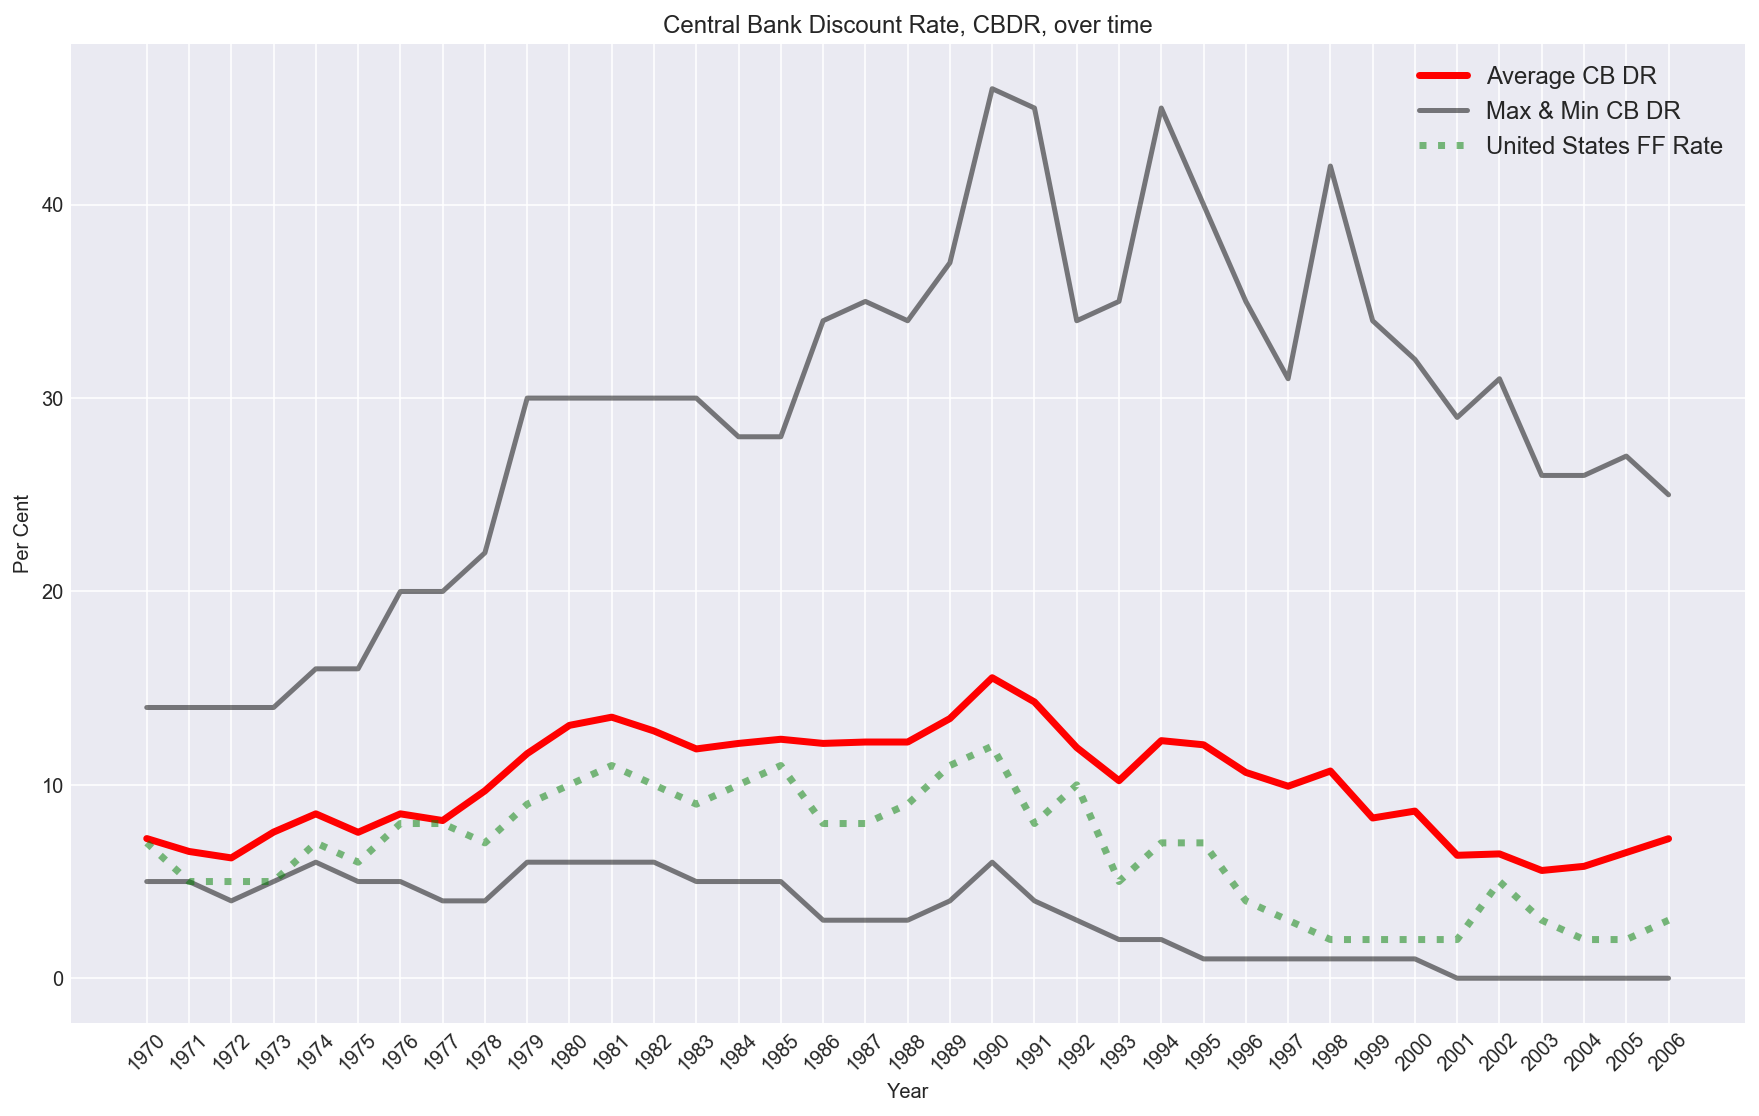

In [284]:
# How the cental bank rates change over time
plt.plot(df_disc.columns[1:], df_disc.mean(), lw=3.5, label="Average CB DR", c='red')

#  max-min central bank rates vs. time
plt.plot(df_disc.columns[1:], df_disc.max(axis=0)[1:], lw=2.5, label="Max & Min CB DR", c='black', alpha=0.5)
plt.plot(df_disc.columns[1:], df_disc.min(axis=0)[1:], lw=2.5, c='black', alpha=0.5)

# Trying to fill between: didnt work
# plt.fill_between(x=df_disc.columns[1:], y1=df_disc.min(axis=0)[1:], y2=df_disc.max(axis=0)[1:], lw=2.5, label="Max & Min CB DR", c='black', alpha=0.5)

# united states rare
plt.plot(df_disc.columns[1:], df_disc.iloc[11][1:], lw=3.5, c='green', alpha=0.5, label="United States FF Rate",ls=':')

plt.xlabel('Year')
plt.ylabel('Per Cent', )
plt.title('Central Bank Discount Rate, CBDR, over time')
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.show()

<b>Commentary:</b> Looking at the aggregated average discount rates, it has been noted that the min-max spread grew wider between 1975 and 2005. Peaks of Central Bank Discount Rate (CB DR) coincide with major economic and financial crisis: 1976 IMF, 1987 Black Monday, 1994 Internation Debt and 1997-98 Emerging Economies crisis. One of the possbile explanantion is a Central Bank ristrictive monetary policy aimed on market stabilisation. 
Visually, CBDR mean level corresponds with US FedFund Rate, which can be explained by greater impact of biggest economy. The maximum levels of CBRB represent less stable (Greek, Portugeese) economies. 

In [263]:
# infer correlations matrix for discount rate for each country
p1=df_disc.copy()

correl=p1.set_index('Country').T.corr()
correl.reset_index(inplace=True,drop=False)
correl.columns.names = [''] 
f_q1['Discount to FF-Rate']=correl['United States']

f_q1=f_q1.set_index('Country') # For unknown reason, only this sets out new index!
f_q1['Discount to Global Mean']=df_disc.set_index('Country').corrwith(df_disc.mean(),axis=1)
f_q1.reset_index(inplace=True,drop=False)

f_q1

,Country,Discount to FF-Rate,Discount to Global Mean
0,Barbados,0.251361,0.513710
1,Canada,0.867872,0.678709
2,Colombia,0.193433,0.889823
3,Costa Rica,-0.230117,0.534638
4,Denmark,0.646415,0.467963
5,Fiji,0.611797,0.738153
6,Japan,0.645041,0.300625
7,Kuwait,0.234683,0.611506
8,New Zealand,0.458699,0.656489
9,Norway,0.206183,0.718316


<b>Commentary:</b> FedFund Rates are positevly correlated with other high income countries CB rates, although rates correlation structure is insignificant. For such marginal correlation structures, its is possible check for statistical significance with P- and T-tests.
On opposite, global mean level found to be more explanatory, which assumes an existiance of explanotary macro factors and general intercorrelation structure. This is pending further research.
Possbily, create 3 extra plots: investment, GDP growth, Exports

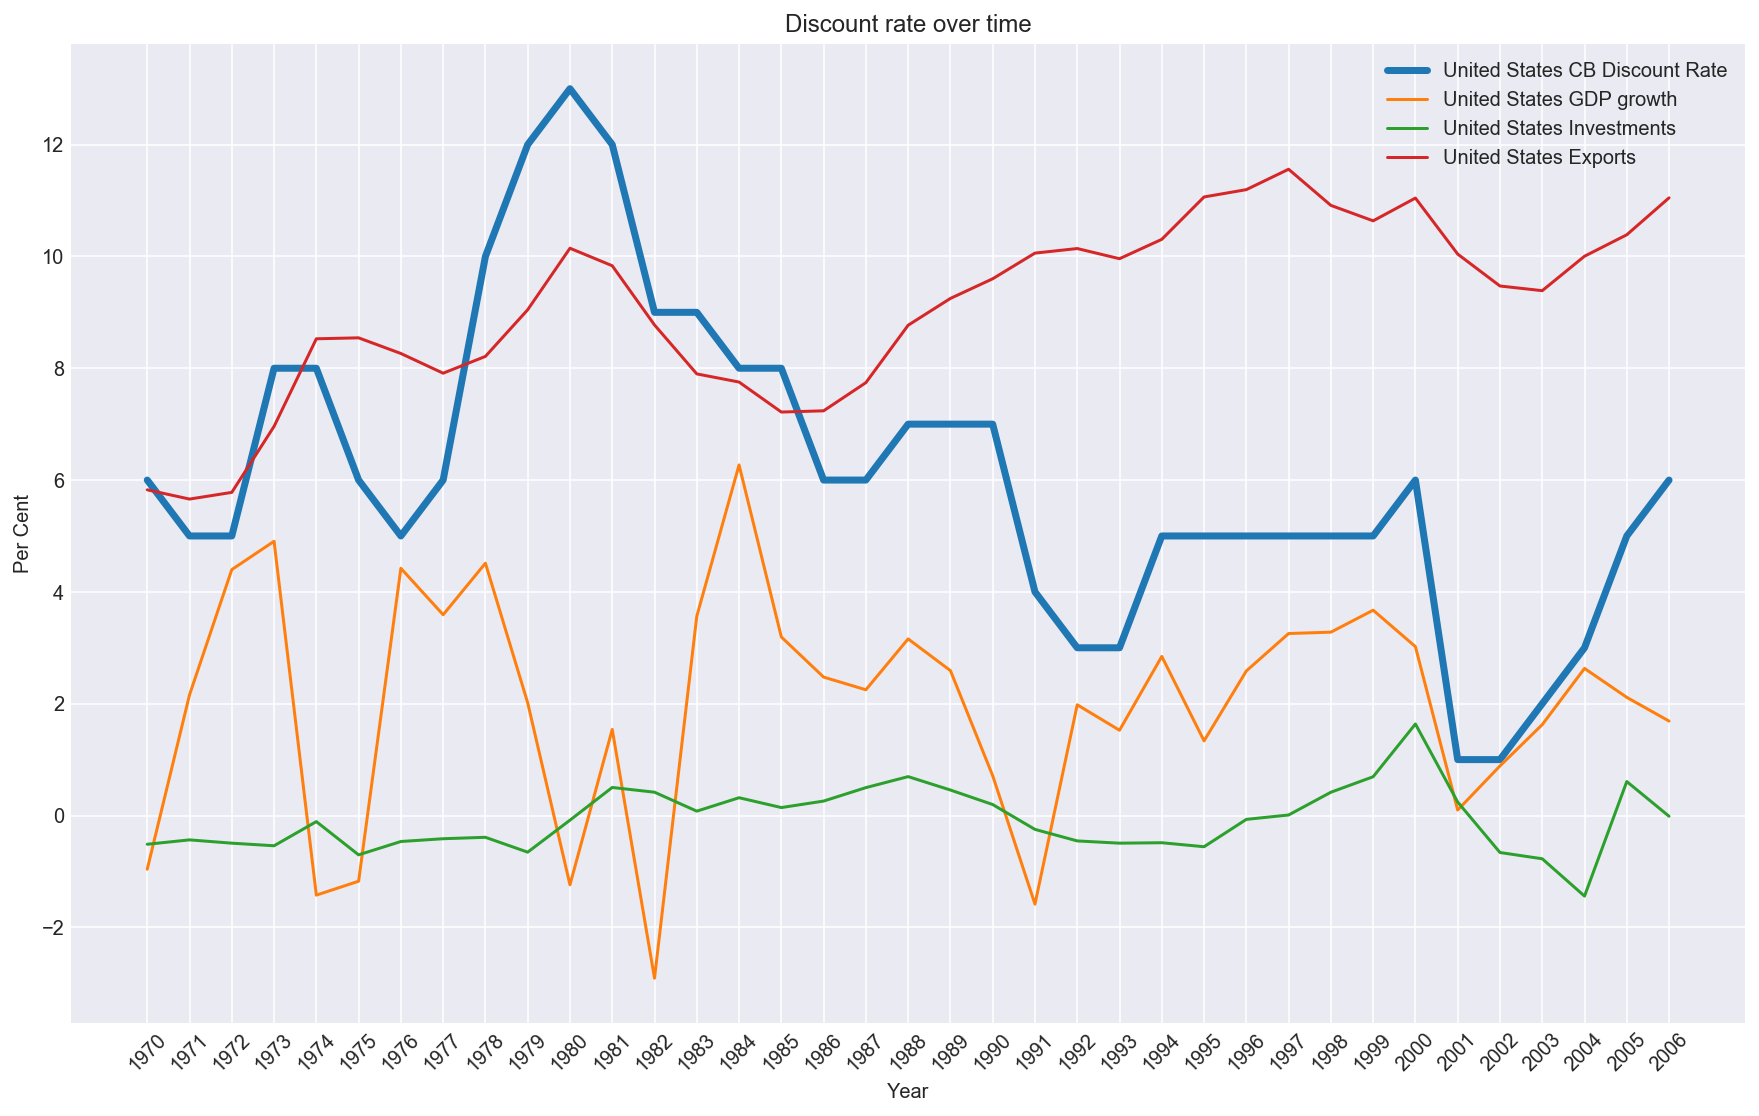

In [247]:
# Q1: Interest to GDP / investment / export  and Debt Servicing cost 

i = 13 # for United Stated 
# for each column: df_disc.iloc[i,1:]
plt.plot(df_disc.columns[1:], df_disc.iloc[i,1:], label=(df_disc.iloc[i,0]+" CB Discount Rate"),  linewidth=3.5)
plt.plot(df_gdp.columns[1:], df_gdp.iloc[i,1:], label=(df_gdp.iloc[i,0]+" GDP growth"))
plt.plot(df_inv.columns[1:], df_inv.iloc[i,1:], label=(df_inv.iloc[i,0]+" Investments"))
plt.plot(df_exp.columns[1:], df_exp.iloc[i,1:], label=(df_exp.iloc[i,0]+" Exports"))

plt.xlabel('Year')
plt.ylabel('Per Cent', )
plt.title('Discount rate over time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [264]:
# Follow it up by looking at relationships between variables
f_q1['Discount-GDP']=df_disc.corrwith(df_gdp, axis=1)
f_q1['Discount-Export']=df_disc.corrwith(df_exp, axis=1)
f_q1['Discount-Invesments']=df_disc.corrwith(df_inv, axis=1)
f_q1

,Country,Discount to FF-Rate,Discount to Global Mean,Discount-GDP,Discount-Export,Discount-Invesments
0,Barbados,0.251361,0.513710,-0.553283,0.275008,-0.054406
1,Canada,0.867872,0.678709,-0.099349,-0.566815,0.196667
2,Colombia,0.193433,0.889823,-0.172509,0.226466,-0.004868
3,Costa Rica,-0.230117,0.534638,-0.253111,0.391549,0.125926
4,Denmark,0.646415,0.467963,-0.049450,-0.702610,-0.099414
5,Fiji,0.611797,0.738153,-0.292905,-0.478937,-0.141470
6,Japan,0.645041,0.300625,0.304087,0.190892,0.069283
7,Kuwait,0.234683,0.611506,-0.103491,-0.240944,-0.240075
8,New Zealand,0.458699,0.656489,-0.254683,-0.120465,0.007937
9,Norway,0.206183,0.718316,-0.235530,-0.132492,0.166367


<a id='Q1 Conclusions'></a>
### Q1 Conlcusions

<b>Discount vs GDP: </b>
Central Bank Discount Rate has two major applications: restrictive monetary policy aimed to stabilize the market and economy, and stimulation of economy growth through access to cheaper credit. The first has been supported through  correspodance between high discount rates-crisis; the second can be inferred through negative correlation to GDP growth as shown in the table above. 
The correlations may also suggest that in the last 50 years, high CBDR either triggered or responded to market crush, and subsequenlty halted GDP growth rate. 
An analysis of other factors is required, to conclude with high certainty on GDP growth-discount rate co-dependence.

<b>Discount vs Foreign investments</b> are not directly correlated, since discount rates are not directly investable. Sovereign bonds which are linked to CB monetary policies, on opposite, are tradable and can attract foreign investment. High coupon and low risk, or high cost of money may attract foreign investments, and therefore engage the growth of economy. In reality this connection is weak (as shown in the last column of the table above), and nivellated by reduction in capital spendings across all economy sector.

<b>Discount to Export </b> in theory have negative correlation, since higher production cost result in high exports prices, reduces exports and widens trade deficit. Although, the correlations are negative, the pair was ommited from review due to high rate of missing data.

### Q2 Does interest rate has a direct connection with inflation, tax and unemployement rate?

Question 2 goes further into States' and Central Banks' monetary policies. Although a certain parralels can be drawn between countries, an aggregation can reduce dimensionality of conclusions. Therefore, each country is being analysed individaully.

In [268]:
# Q2: Interest to inflation, tax, unemployment
# Correlations

f_q2=f_q2.copy()
f_q2['Discount-Inlfation']=df_discount.corrwith(df_infl, axis=1)
f_q2['Discount-Tax']=df_discount.corrwith(df_tax, axis=1)
f_q2['Discount-Unemployement']=df_discount.corrwith(df_unemp, axis=1)
f_q2

,Country,Discount-Inlfation,Discount-Tax,Discount-Unemployement
0,Belgium,0.465267,-0.709219,0.019546
1,Canada,0.635026,0.256280,0.019496
2,Denmark,0.671950,-0.781422,0.758494
3,Finland,0.651974,-0.701351,0.134461
4,Greece,0.785422,-0.765588,-0.584269
5,Italy,0.696971,-0.613307,0.417793
6,Portugal,0.819046,-0.789407,-0.355404
7,Spain,0.332051,0.280650,0.464345
8,Sweden,0.661483,-0.808021,-0.495436


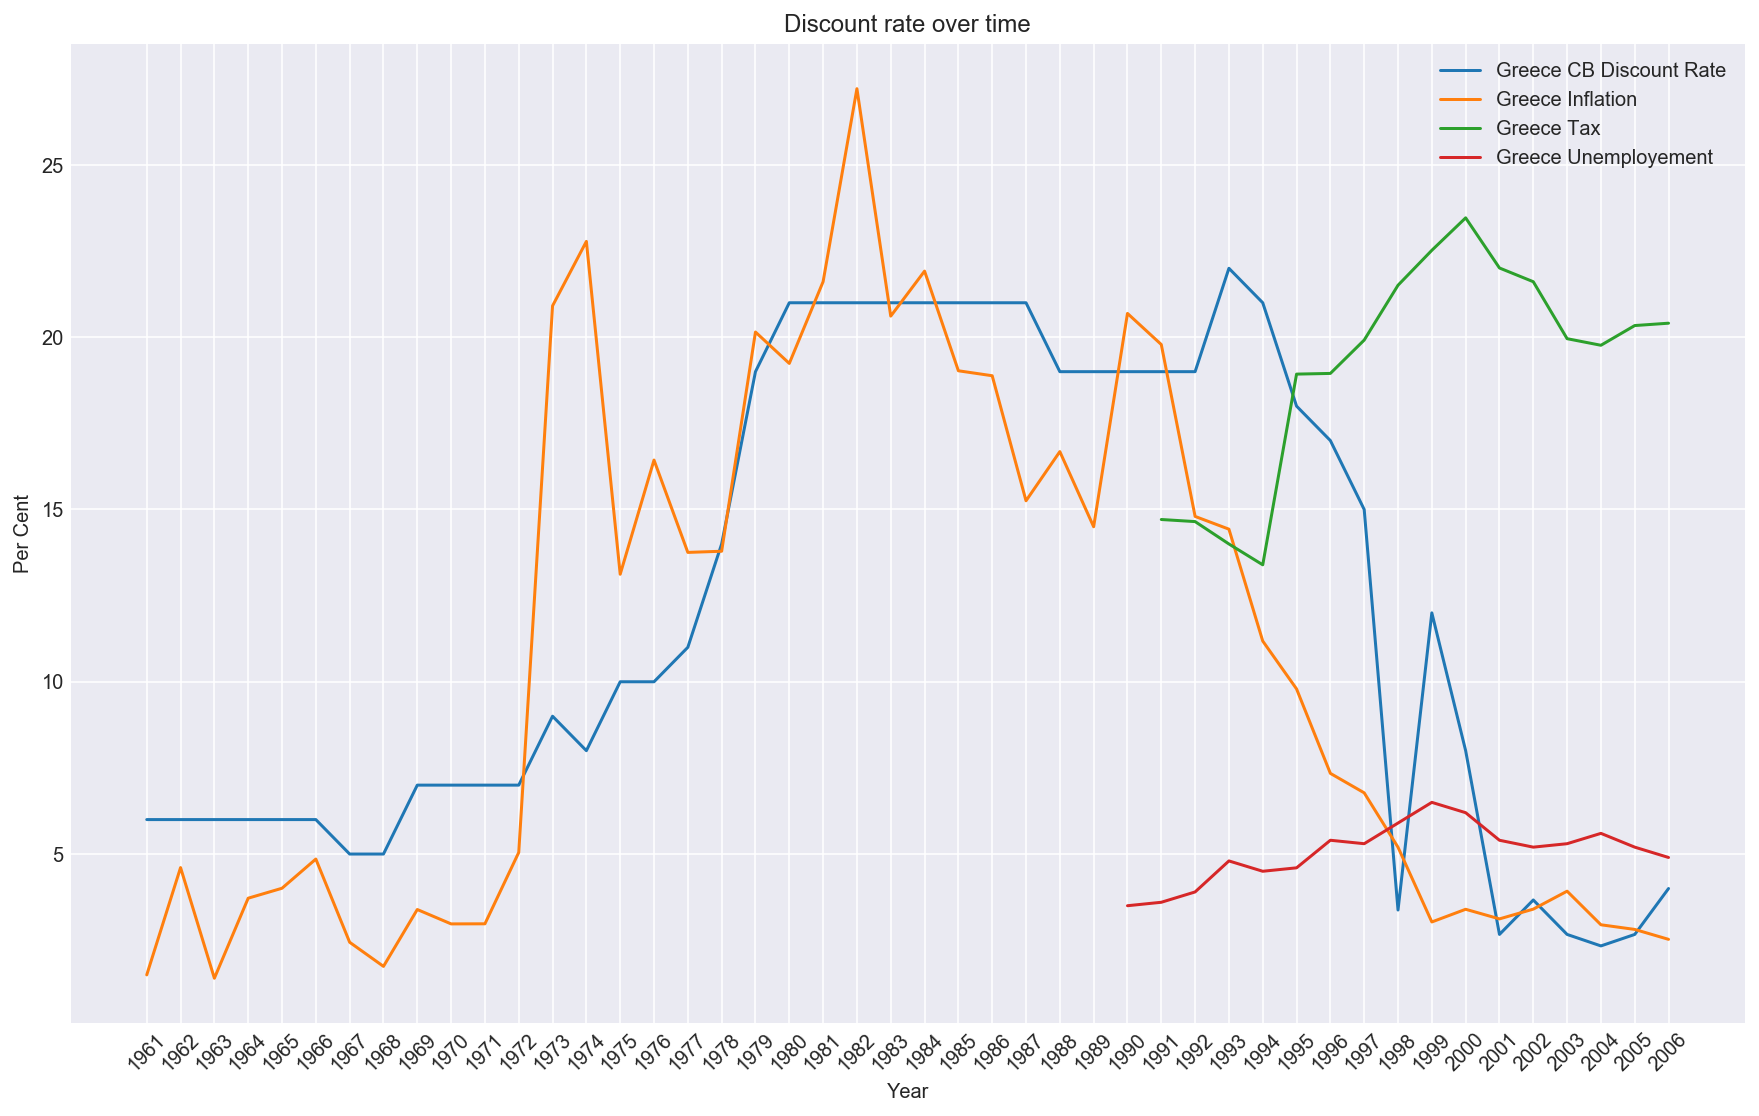

In [282]:
# Plotting graphs for each country
 
i = 4 # country number

plt.plot(df_discount.columns[1:], df_discount.iloc[i,1:], label=(df_discount.iloc[i,0]+" CB Discount Rate"))
plt.plot(df_infl.columns[1:], df_infl.iloc[i,1:], label=(df_infl.iloc[i,0]+" Inflation"))
plt.plot(df_tax.columns[1:], df_tax.iloc[i,1:], label=(df_tax.iloc[i,0]+" Tax"))
plt.plot(df_unemp.columns[1:], df_unemp.iloc[i,1:], label=(df_unemp.iloc[i,0]+" Unemployement"))

plt.xlabel('Year')
plt.ylabel('Per Cent', )
plt.title('Discount rate over time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<a id='Q2 Conclusions'></a>
### Conlcusions Q2

<b>Discount-Inflation </b> pair shows high positive correlation, which supports the premise of cheap money, and increased borrowing. Runnning historical graphs for several countries, two scenrios became evident:
- high discount rates are introduced to reduce inflation expectations (e.g. Canada, Greece, Portugal, Spain)
- lower discount rates have and inflation are correlated to some third factor (e.g. Denmark)

<b>Discount-Tax</b> pair has high negative correlation for most countries considered. In theory, high CB DR lead to low corporate and, consequently, household profit, and further to reduced tax gains. 
In Scandinavian countries increase in tax gains were caused by increased tax rate in order to subsidize social support expenditures, and reduction in CB DR are not causal, but rather aimed to reduce a burden of sudden tax increase. Thus, an opposite causality is most probable, i.e. how CB DR react to change in tax rates.
It should be noted, that only two countries (Spain and Canada) have shown positive correlation for the pair, which most likely is a nature of export-oriented economy. Analysis of Canada and Spain export may be benefitial.

<b>Discount vs. Long-Term unemployement. </b> Theoretically, bank rate to be reduced as the unemployement increase. Since the data is represented on really short time frame, a correlation structure for the pair were not observed. Most likly, there may be a time lag from change of CB DR and until labor and capital markets have time to adjust fully to the new incentive structure. An analysis should include auto-regressive process with lag-n, determined through ACF or PACF.

<a id='Limitations'></a>
## Limitations

- Both questions are represented and therefore conclude on limited group of high- and upper middle income groups.
- Further investigation of other income- and geogrphical groups, as well as 
- Additional sources of more complete data may be benefitial for removing existing research bias
- All findings are tentative 
- Additional methods such as [inferential statistics](http://www.statsmodels.org/dev/tsa.html) or machine learning may be required to conclude on questions in its entirety. 

In [283]:
# To export the report to the workspace, you should run the code cell below. 
# If it worked correctly, you should get a return code of 0, and you should see
# the generated .html file in the workspace directory (click on the jupyter icon in the upper left).
# Alternatively, you can download the html report via the **File** > **Download as** submenu 
# and then manually upload it to the workspace directory. Once you've done this, you can submit
# your project by clicking on the "Submit Project" button in the lower right. Congratulations!

from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-283-a12cde5b0807>, line 9)